In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np

In [2]:
import scanpy as sc

In [3]:
#Read the anndata:
adata_villi= sc.read_h5ad('/data/analysis/preeclampsia_2019/spatial_data/SP014_SP082_SP136_placenta_annotations_250322.h5ad')

adata_villi

AnnData object with n_obs × n_vars = 145637 × 6000
    obs: 'batch', 'cohort', 'disease', 'donor_id', 'gestational_days', 'gestational_weeks', 'library', 'maternal_BMI', 'maternal_age', 'placental_volume', 'procurement', 'smoking', 'time', 'tissue', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_MT_genes', 'log1p_total_counts_MT_genes', 'pct_counts_MT_genes', 'total_counts_Ribo_genes', 'log1p_total_counts_Ribo_genes', 'pct_counts_Ribo_genes', 'total_counts_HB_genes', 'log1p_total_counts_HB_genes', 'pct_counts_HB_genes', 'percent_mt2', 'n_counts', 'percent_Ribo2', 'percent_HB2', 'n_genes', 'XIST-counts', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'leiden', 'celltypist_majority_voting', 'celltypist_predicted_labels', 'LDA_topic_0', 'LDA_topic_1', 'LDA_topic_2', 'LDA_topic_3', 'LDA_topic_4', 'LDA_topic_5', 'LDA_topic_6', 'LDA_topic_7', 'LDA_topic_8', 'LDA_topic_9', 'LDA_top

In [4]:
#Subset only eoPE (late_preterm) & term controls (late_term) samples: 
adata_filter= adata_villi[adata_villi.obs['time'].isin(['late_preterm', 'late_term'])] 
adata_filter.obs['time'].value_counts()

late_preterm    36050
late_term       29702
Name: time, dtype: int64

In [5]:
ldata_norm= adata_filter.raw.to_adata()

sc.pp.normalize_total(ldata_norm, target_sum=1e4)
sc.pp.log1p(ldata_norm)

In [6]:
ldata_norm.obs['condition']= ldata_norm.obs['time'].map(lambda x: {"late_preterm": "PE", "late_term": "Late_term"}.get(x, x)).astype("category")


In [8]:
ldata_norm.obs['leiden_subclusters_refined02'].cat.categories

Index(['APAhi_tropho', 'PAMM', 'vEB1', 'vEVT', 'vFB1', 'vHBC', 'vHBC_prol',
       'vMC', 'vSCT_1', 'vSCT_2', 'vSCTjuv', 'vTcell', 'vVCT', 'vVCT_prol',
       'vVEC'],
      dtype='object')

In [13]:
ldata_norm.obs['condition']= ldata_norm.obs['condition'].cat.reorder_categories(['Late_term', 'PE'])
ldata_norm.obs['condition'].cat.categories

Index(['Late_term', 'PE'], dtype='object')

In [14]:
#Subset a/c to cell types: 
adata_sct1= ldata_norm[ldata_norm.obs['leiden_subclusters_refined02']== 'vSCT_1'] 
adata_sct2= ldata_norm[ldata_norm.obs['leiden_subclusters_refined02']== 'vSCT_2'] 
adata_juv= ldata_norm[ldata_norm.obs['leiden_subclusters_refined02']== 'vSCTjuv'] 
adata_hbc= ldata_norm[ldata_norm.obs['leiden_subclusters_refined02']== 'vHBC'] 
adata_vec= ldata_norm[ldata_norm.obs['leiden_subclusters_refined02']== 'vVEC'] 
adata_tcell= ldata_norm[ldata_norm.obs['leiden_subclusters_refined02']== 'vTcell'] 

In [15]:
adata_sct1.obs['condition'].cat.categories

Index(['Late_term', 'PE'], dtype='object')

In [26]:
sc.settings.set_figure_params(dpi=80)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,4)

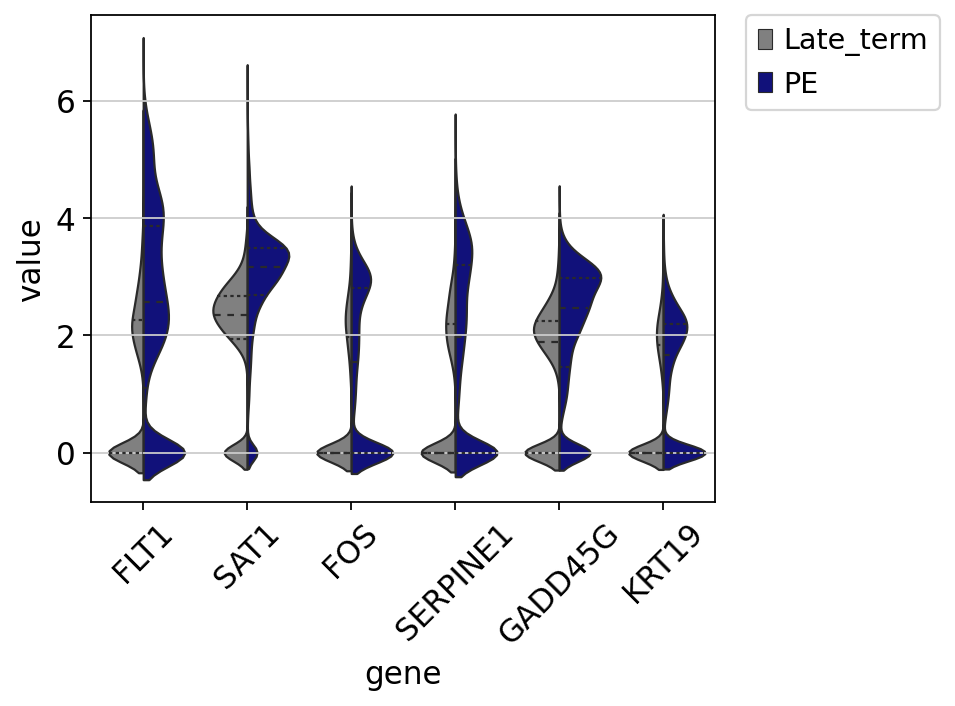

In [22]:
#vSTB1: VP. 
adata_sct1 = adata_sct1[adata_sct1.obs.condition.isin(['Late_term', 'PE'])].copy()

df = sc.get.obs_df(adata_sct1, ['FLT1', 'SAT1', 'FOS', 'SERPINE1', 'GADD45G', 'KRT19', 'condition'])

df = df.set_index('condition').stack().reset_index()
df.columns = ['condition', 'gene', 'value']

import seaborn as sns

sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

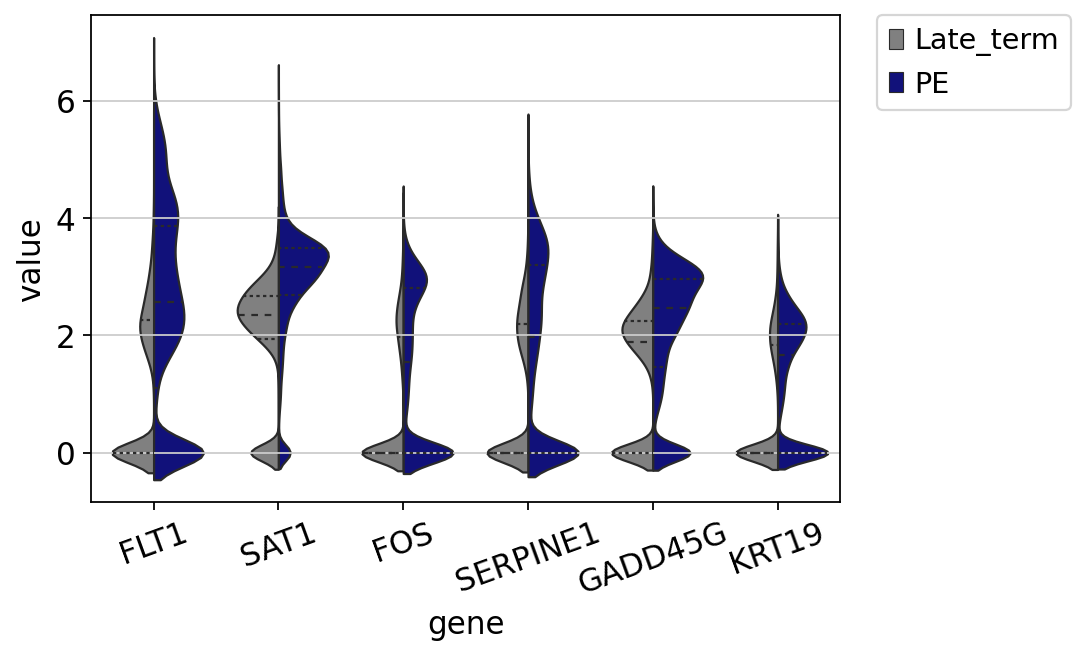

In [30]:
#vSTB1: manuscript VP. 
sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("vSTB1_dysregulated_DEG_150622.pdf")

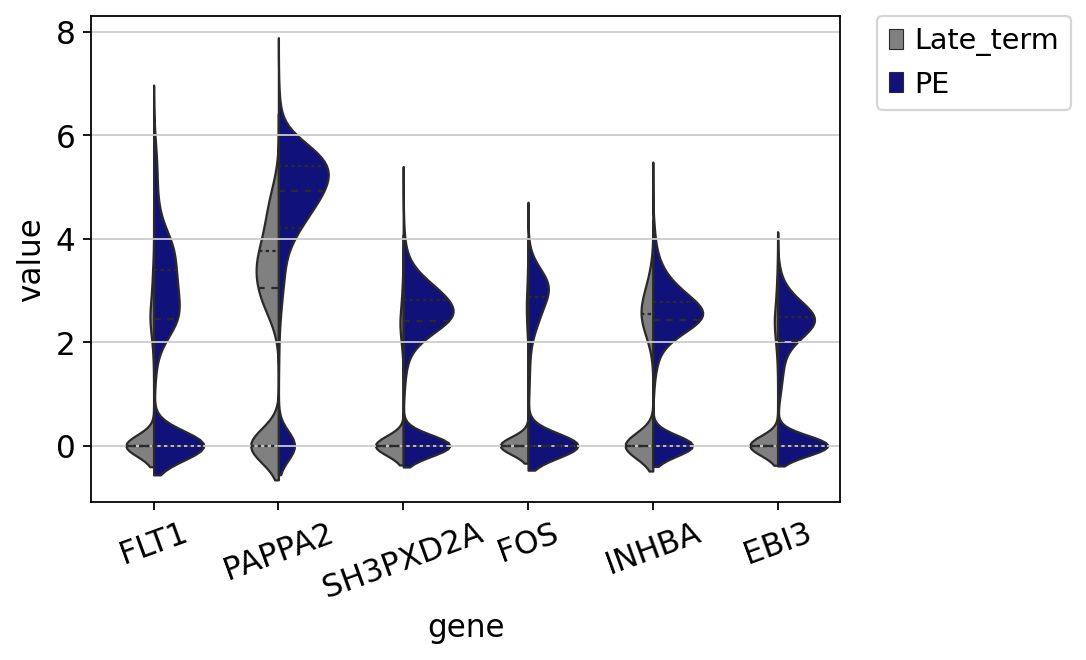

In [32]:
#vSTB2: manuscript VP.
adata_sct2 = adata_sct2[adata_sct2.obs.condition.isin(['Late_term', 'PE'])].copy()

df = sc.get.obs_df(adata_sct2, ['FLT1', 'PAPPA2', 'SH3PXD2A', 'FOS', 'INHBA', 'EBI3', 'condition'])
df = df.set_index('condition').stack().reset_index()
df.columns = ['condition', 'gene', 'value']


sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("vSTB2_dysregulated_DEG_150622.pdf")

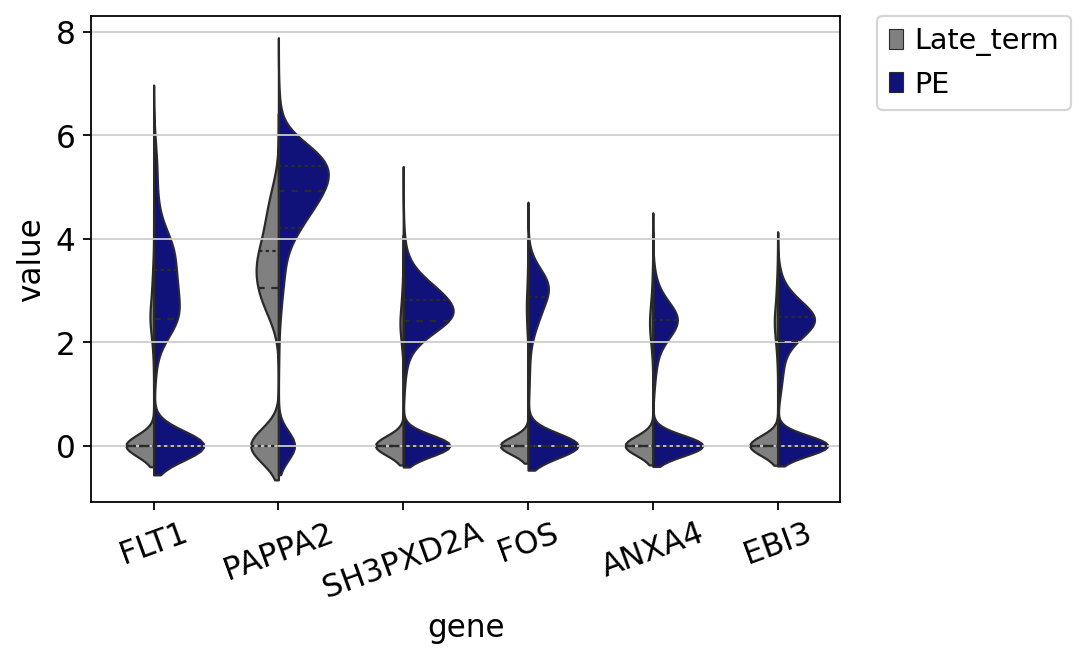

In [35]:
df = sc.get.obs_df(adata_sct2, ['FLT1', 'PAPPA2', 'SH3PXD2A', 'FOS', 'ANXA4', 'EBI3', 'condition'])
df = df.set_index('condition').stack().reset_index()
df.columns = ['condition', 'gene', 'value']


sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("vSTB2_dysregulated_DEG_v2_150622.pdf")

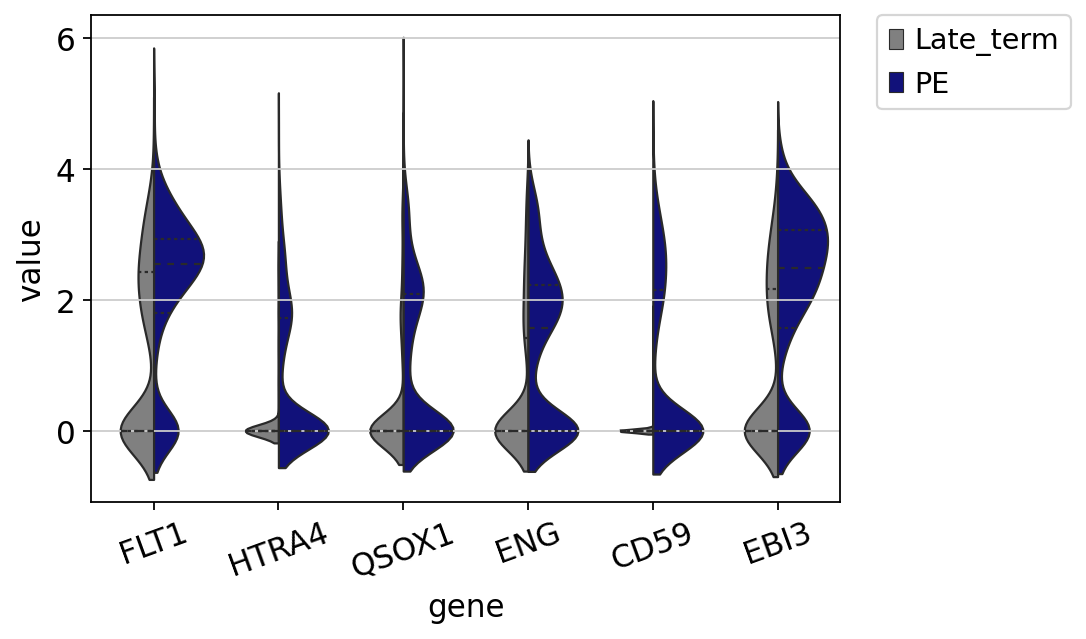

In [39]:
#vSTBjuv: manuscript VP. 
adata_juv = adata_juv[adata_juv.obs.condition.isin(['Late_term', 'PE'])].copy()

df = sc.get.obs_df(adata_juv, ['FLT1', 'HTRA4', 'QSOX1', 'ENG', 'CD59', 'EBI3', 'condition'])
df = df.set_index('condition').stack().reset_index()
df.columns = ['condition', 'gene', 'value']


sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("vSTBjuv_dysregulated_DEG_v1_150622.pdf")

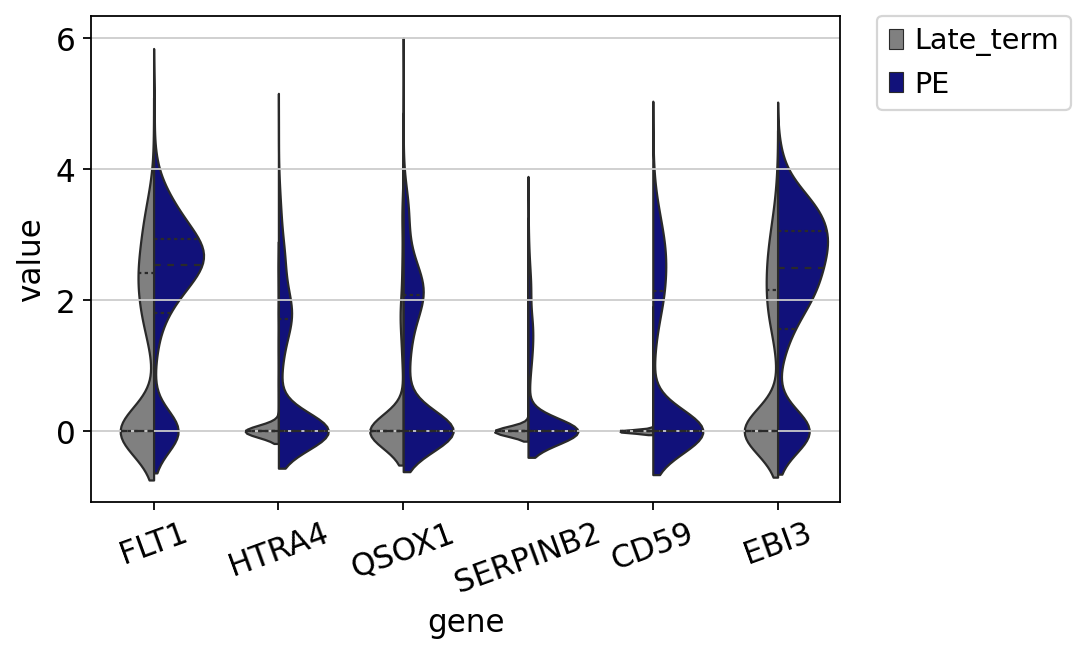

In [40]:
adata_juv = adata_juv[adata_juv.obs.condition.isin(['Late_term', 'PE'])].copy()

df = sc.get.obs_df(adata_juv, ['FLT1', 'HTRA4', 'QSOX1', 'SERPINB2', 'CD59', 'EBI3', 'condition'])
df = df.set_index('condition').stack().reset_index()
df.columns = ['condition', 'gene', 'value']


sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("vSTBjuv_dysregulated_DEG_v2_150622.pdf")

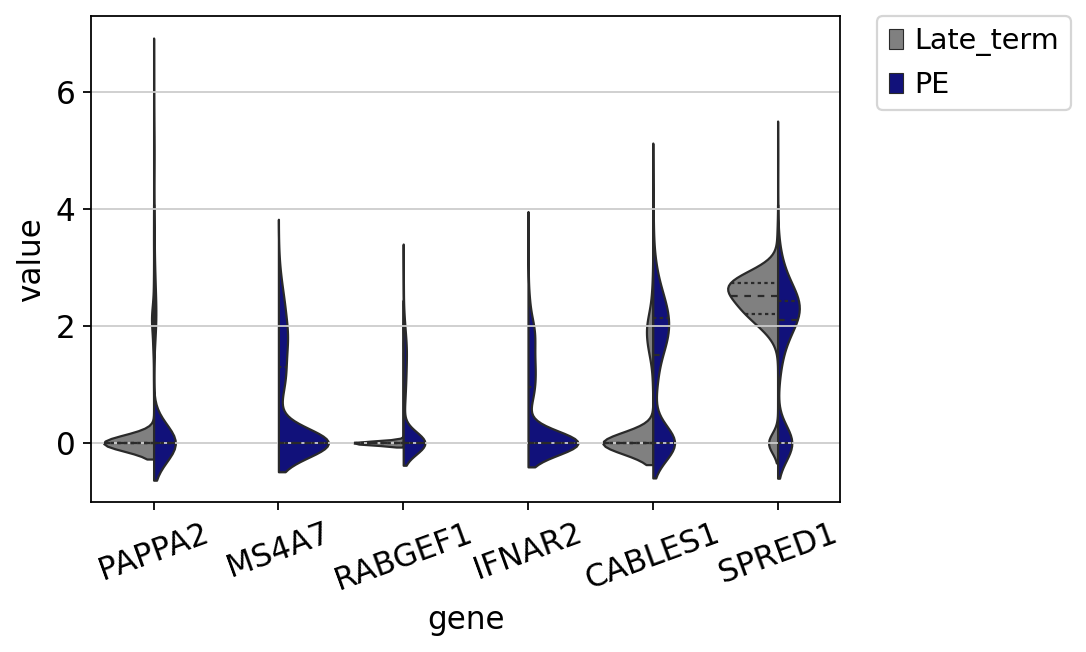

In [41]:
adata_hbc = adata_hbc[adata_hbc.obs.condition.isin(['Late_term', 'PE'])].copy()

df = sc.get.obs_df(adata_hbc, ['PAPPA2', 'MS4A7', 'RABGEF1', 'IFNAR2', 'CABLES1', 'SPRED1', 'condition'])
df = df.set_index('condition').stack().reset_index()
df.columns = ['condition', 'gene', 'value']


sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("vHBC_dysregulated_DEG_v2_150622.pdf")

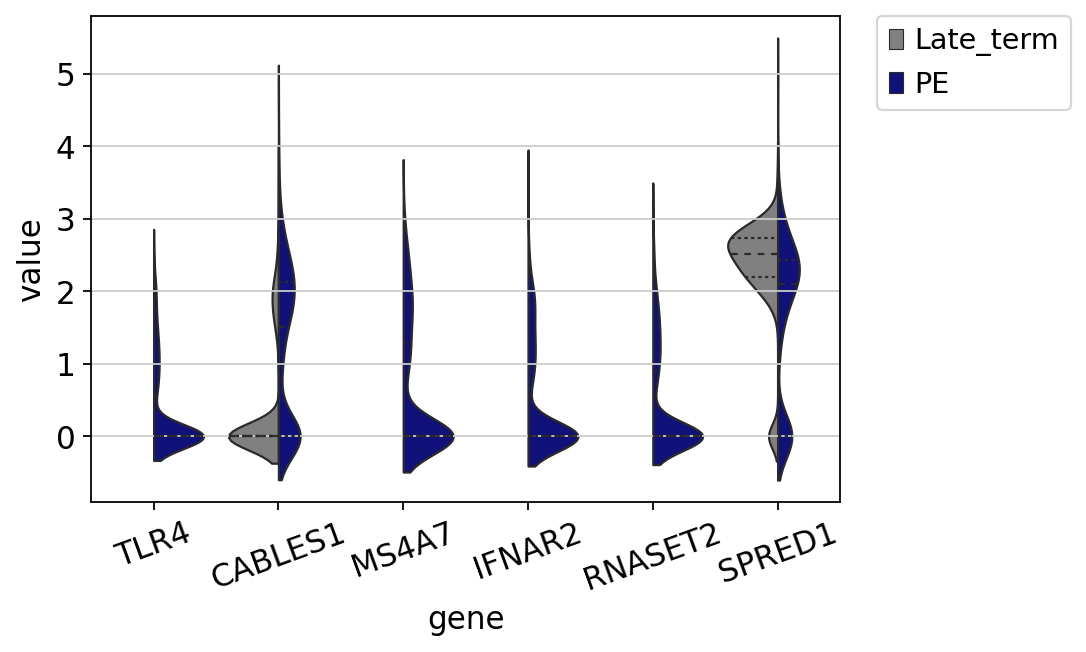

In [43]:
#vHBC: manuscript VP. 
adata_hbc = adata_hbc[adata_hbc.obs.condition.isin(['Late_term', 'PE'])].copy()

df = sc.get.obs_df(adata_hbc, ['TLR4', 'CABLES1', 'MS4A7', 'IFNAR2', 'RNASET2', 'SPRED1', 'condition'])
df = df.set_index('condition').stack().reset_index()
df.columns = ['condition', 'gene', 'value']


sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("vHBC_dysregulated_DEG_v2_RNASET2_150622.pdf")

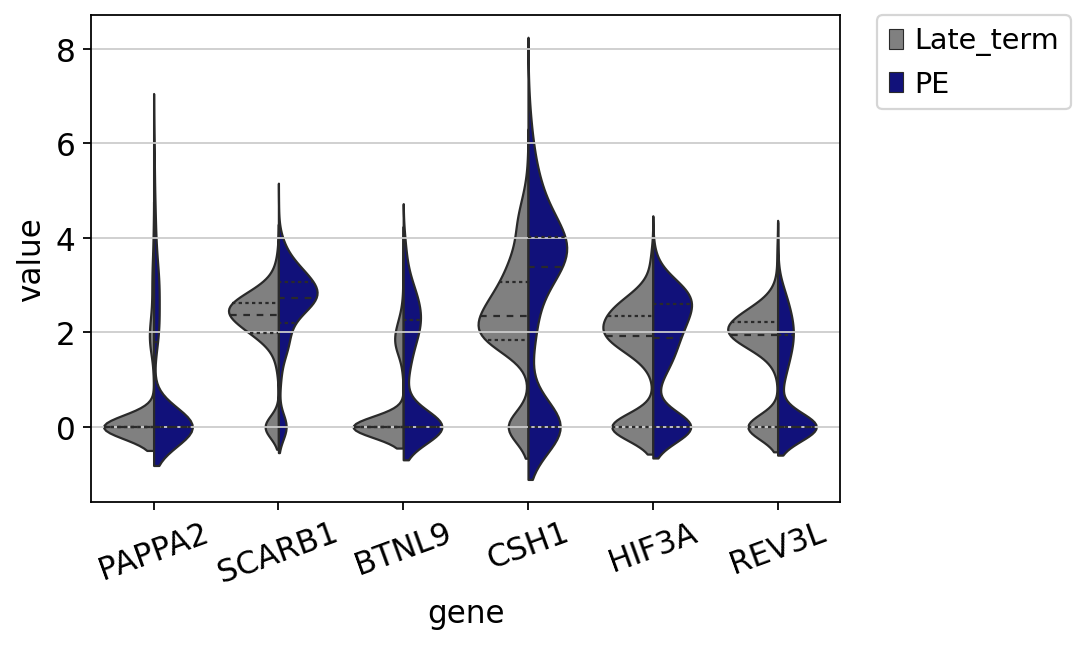

In [45]:
#vVEC: manuscript VP. 
adata_vec = adata_vec[adata_vec.obs.condition.isin(['Late_term', 'PE'])].copy()

df = sc.get.obs_df(adata_vec, ['PAPPA2', 'SCARB1', 'BTNL9', 'CSH1', 'HIF3A', 'REV3L', 'condition'])
df = df.set_index('condition').stack().reset_index()
df.columns = ['condition', 'gene', 'value']


sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("vVEC_dysregulated_DEG_v1_RNASET2_150622.pdf")

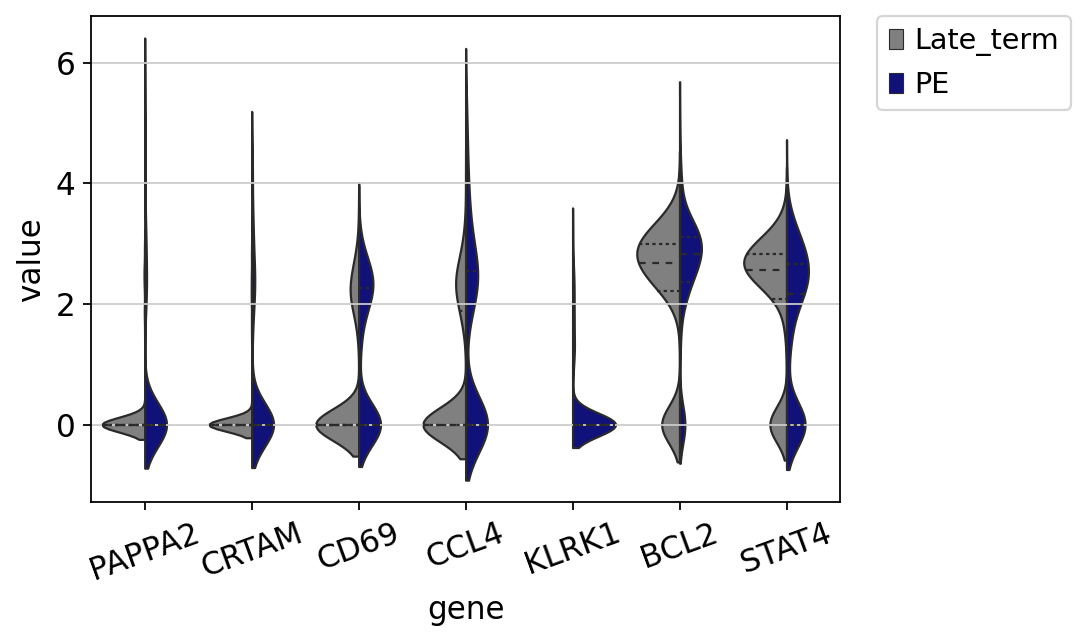

In [46]:
#vTcell:  
adata_tcell = adata_tcell[adata_tcell.obs.condition.isin(['Late_term', 'PE'])].copy()

df = sc.get.obs_df(adata_tcell, ['PAPPA2', 'CRTAM', 'CD69', 'CCL4', 'KLRK1', 'BCL2', 'STAT4', 'condition'])
df = df.set_index('condition').stack().reset_index()
df.columns = ['condition', 'gene', 'value']


sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("vTcell_dysregulated_DEG_v1_150622.pdf")

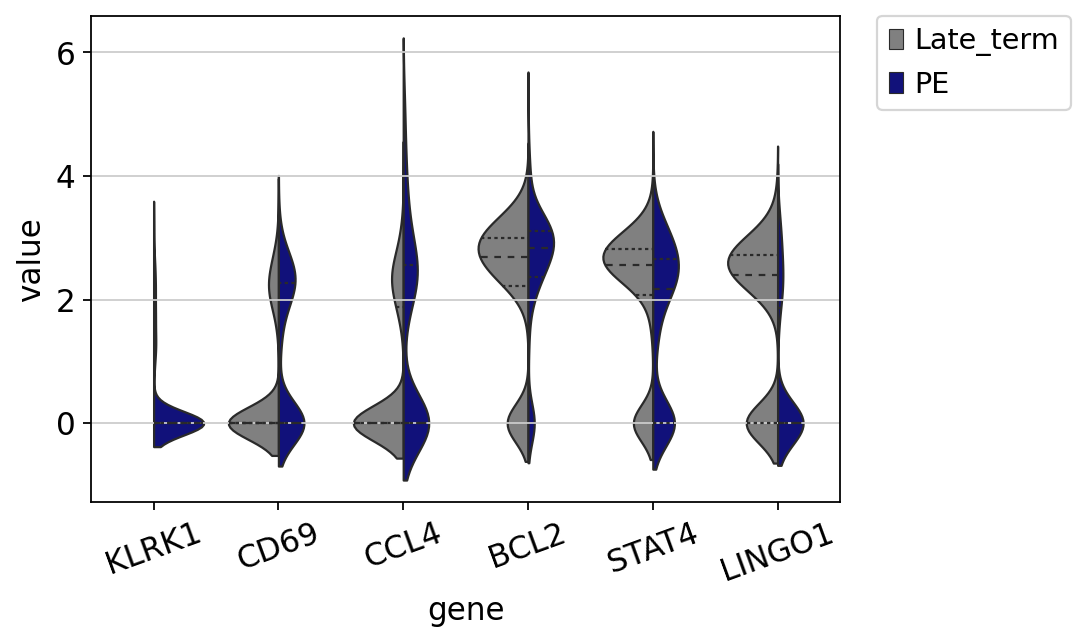

In [50]:
#vTcell: included as manuscript VP. 
adata_tcell = adata_tcell[adata_tcell.obs.condition.isin(['Late_term', 'PE'])].copy()

df = sc.get.obs_df(adata_tcell, ['KLRK1', 'CD69', 'CCL4', 'BCL2', 'STAT4', 'LINGO1', 'condition'])
df = df.set_index('condition').stack().reset_index()
df.columns = ['condition', 'gene', 'value']


sns.violinplot(data=df, x='gene', y='value', hue= "condition",
                split=True, inner="quart", linewidth=1, scale= "count", palette= ['grey', 'darkblue']) 

plt.xticks(rotation=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("vTcell_dysregulated_DEG_v2_150622.pdf")